In [611]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [612]:
df = pd.read_csv("ElectricCarData_Norm.csv")
df['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [613]:
#managing the dataset to easily visualize data
for i in range(0, 103):
    df.loc[i, 'Accel'] = df.loc[i, 'Accel'][:len(df.loc[i, 'Accel'])-4]
for i in range(0, 103):
    df.loc[i, 'TopSpeed'] = df.loc[i, 'TopSpeed'][:len(df.loc[i, 'TopSpeed'])-5]
for i in range(0, 103):
    df.loc[i, 'Range'] = df.loc[i, 'Range'][:len(df.loc[i, 'Range'])-3]
for i in range(0, 103):
    df.loc[i, 'Efficiency'] = df.loc[i, 'Efficiency'][:len(df.loc[i, 'Efficiency'])-6]
for i in range(0, 103):
    if df.loc[i, 'FastCharge'] == '-':
        df.loc[i, 'FastCharge'] = None
    else:
        df.loc[i, 'FastCharge'] = df.loc[i, 'FastCharge'][:len(df.loc[i, 'FastCharge'])-5]

In [614]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [615]:
df.shape

(103, 14)

In [616]:
df.dtypes

Brand          object
Model          object
Accel          object
TopSpeed       object
Range          object
Efficiency     object
FastCharge     object
RapidCharge     int64
PowerTrain     object
PlugType       object
BodyStyle      object
Segment        object
Seats           int64
PriceEuro       int64
dtype: object

In [617]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     5
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [618]:
df['FastCharge'] = df['FastCharge'].fillna("500") # to fill the None values of object

In [619]:
# convert the datatype of columns to visualize
df['TopSpeed'] = df['TopSpeed'].astype('Int64')
df['Range'] = df['Range'].astype("Int64")
df['Efficiency'] = df['Efficiency'].astype("Int64")
df['Accel'] = df['Accel'].astype('float64')
df['FastCharge'] = df['FastCharge'].astype("Int64")

In [620]:
df.dtypes

Brand           object
Model           object
Accel          float64
TopSpeed         Int64
Range            Int64
Efficiency       Int64
FastCharge       Int64
RapidCharge      int64
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [621]:
df_copy = df.copy()

In [622]:
# visualize which car has top speed
fig = px.bar(df,x='Brand',y = 'TopSpeed',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed KM/HR'})
pio.show(fig)

In [623]:
# visualize which car has fastest accelaration
fig = px.bar(df,x='Accel',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

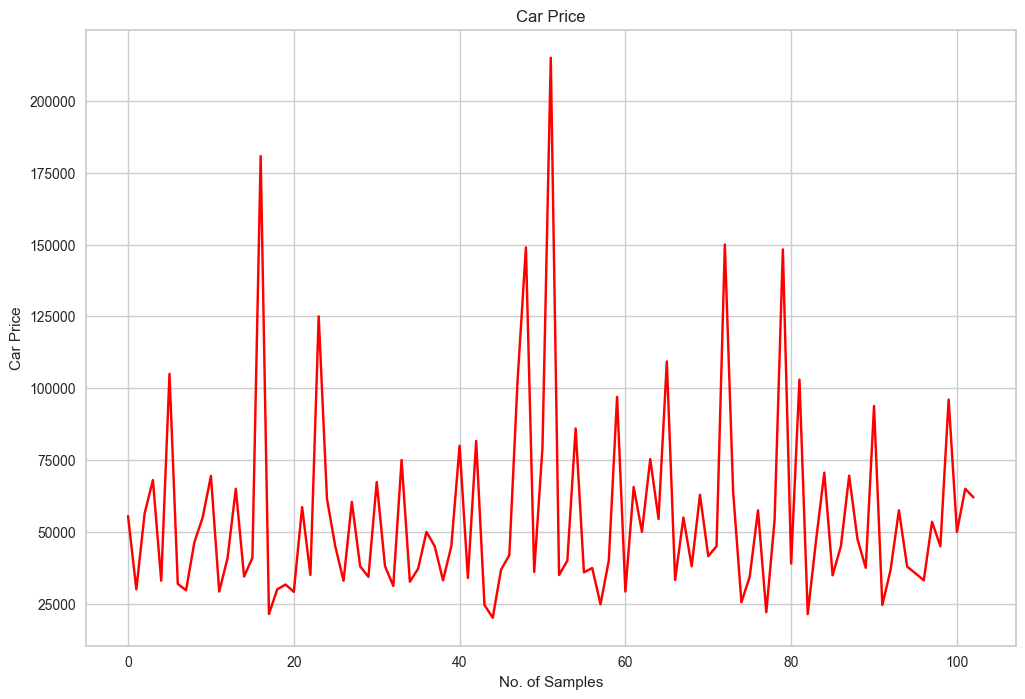

In [624]:
# visualize the graph between car price and no. of samples
df['PriceEuro'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

In [625]:
# visualize the relationships between range and powertrain
fig = px.bar(df,x = 'Range',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

In [626]:
# visualize by pie chart between Brand and Price
fig = px.pie(df,names = 'Brand',values = 'PriceEuro')
pio.show(fig)

In [627]:
# visualize relationship between rapidcharge and price by box plot
fig = px.box(df,x='RapidCharge',y = 'PriceEuro',color = 'RapidCharge',points='all')
pio.show(fig)

In [628]:
# visualize relationship between brand and range by scattering data
fig = px.scatter(df,x = 'Brand',y = 'Range', size='Seats',color = 'Brand',hover_data=['RapidCharge','PriceEuro'])
pio.show(fig)

<Axes: >

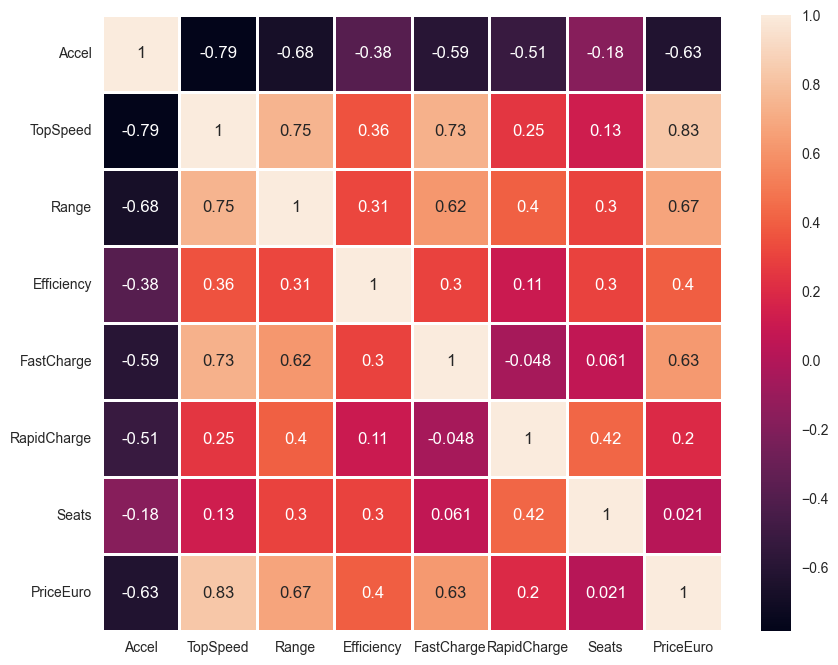

In [629]:
# visualize the correlation heatmap with all numerical data
import seaborn as sb
df_n = df[['Accel','TopSpeed','Range' ,'Efficiency','FastCharge' ,'RapidCharge','Seats', 'PriceEuro']]
ax= plt.figure(figsize=(10,8))
sb.heatmap(df_n.corr(), linewidths=1, linecolor='white', annot=True)

In [630]:
a=np.arange(1,104)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

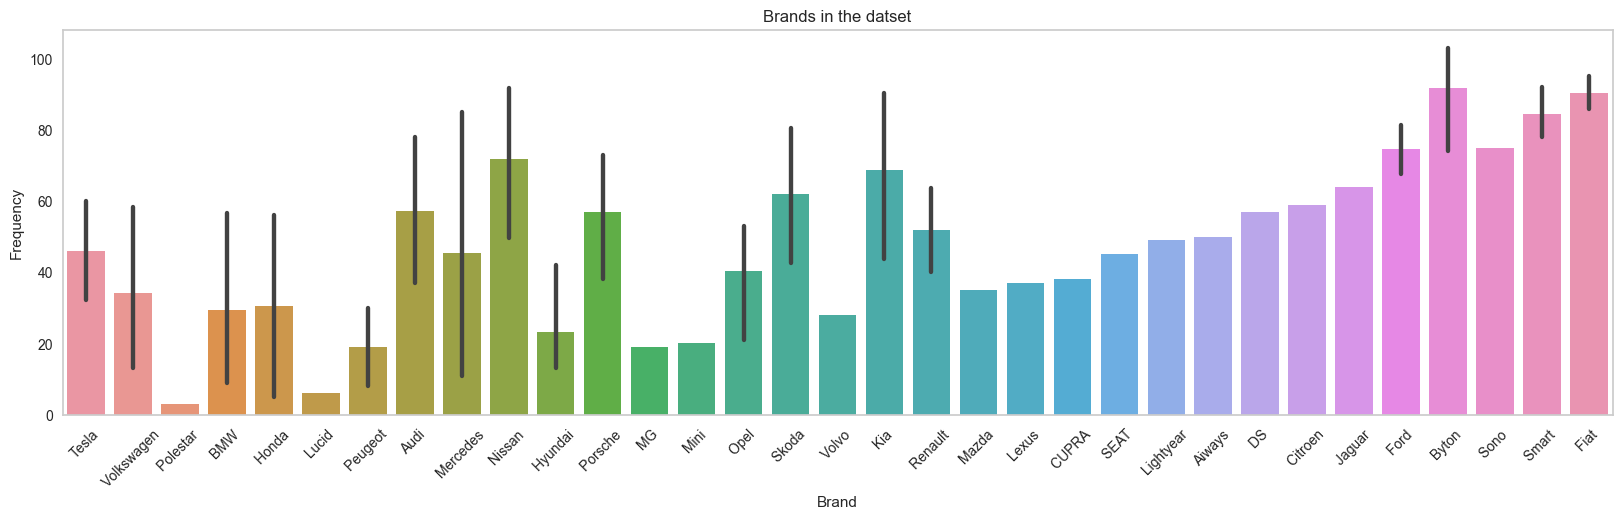

In [631]:
# visualize frequency of brand in dataset
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Byton , Fiat and smart are the prominent brands and Polestar being the least

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

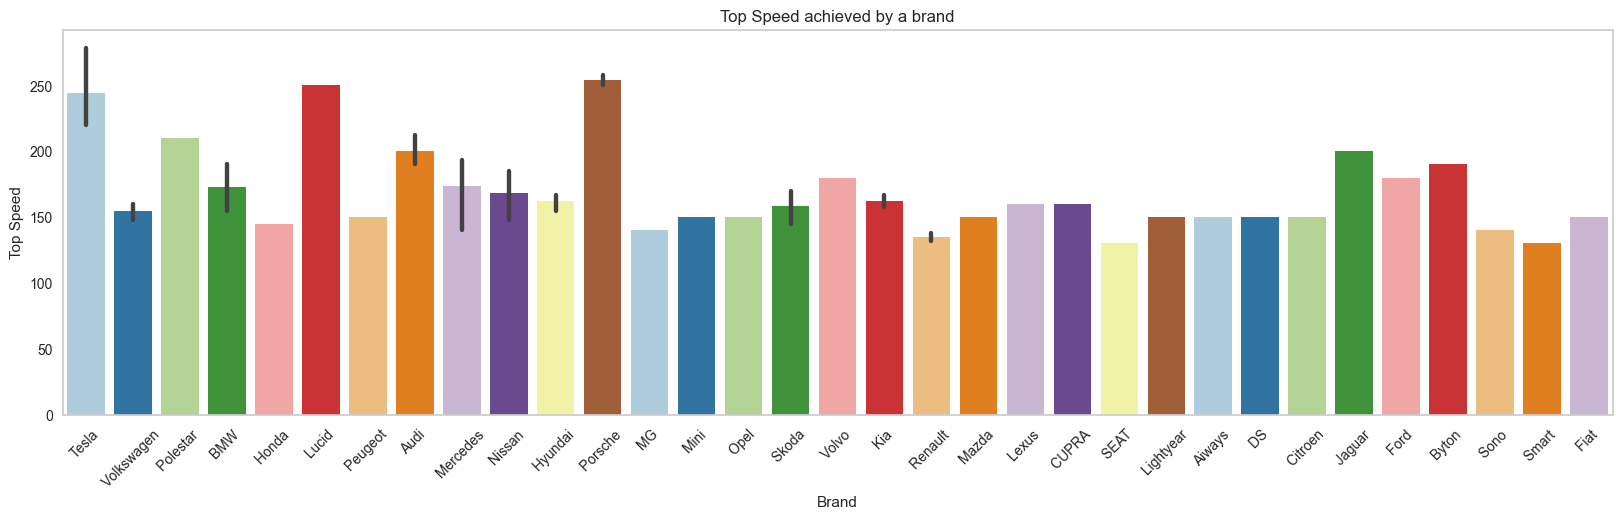

In [632]:
# visualize top speed achieved by brand in dataset
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

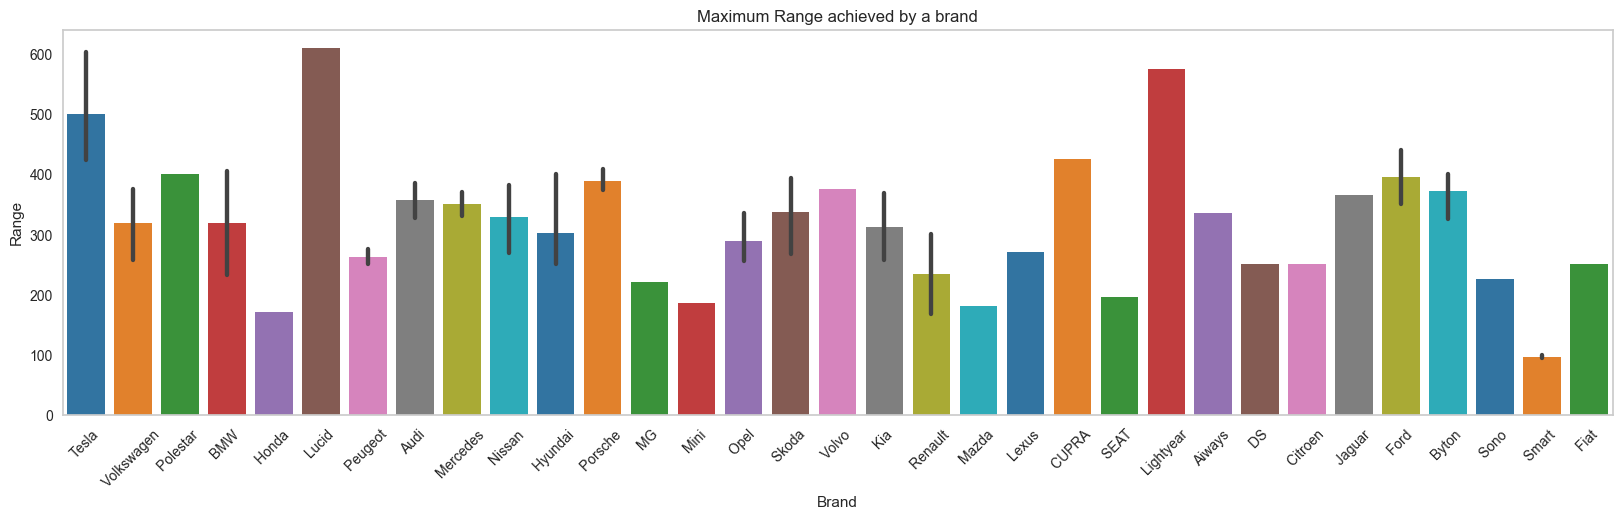

In [633]:
# visualize range a car can achieve in dataset
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Range',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

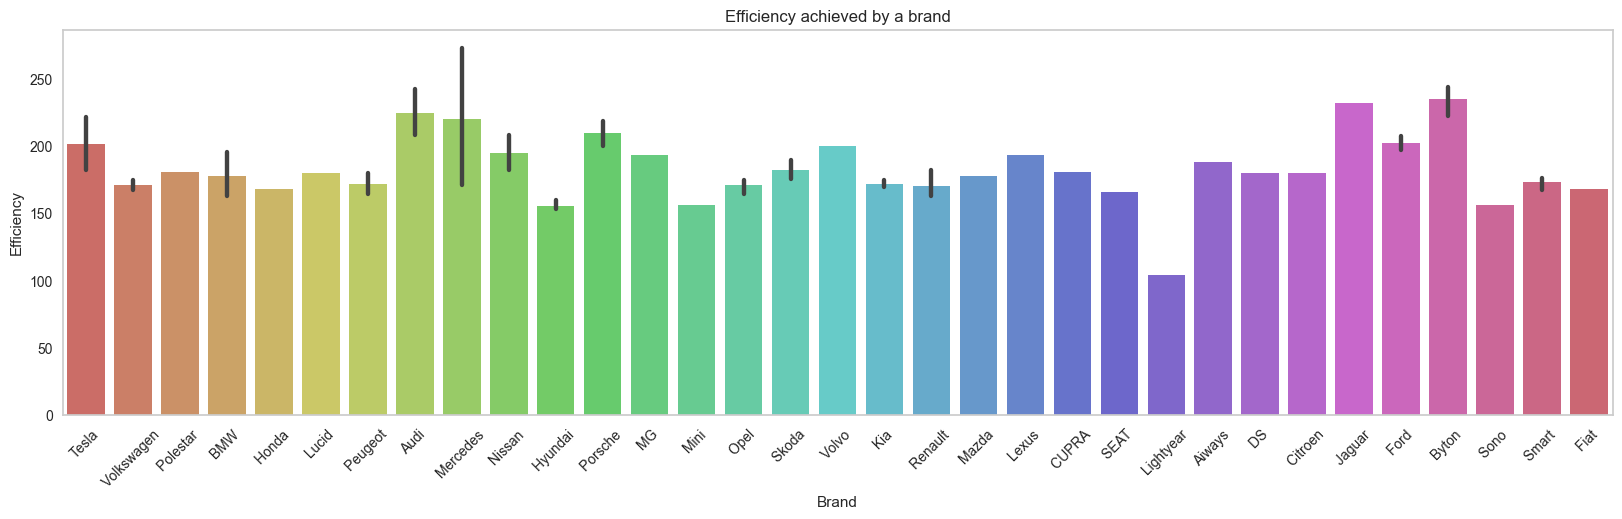

In [634]:
# visualize Efficiency in dataset
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Byton , Jaguar and Audi are the most efficient and Lightyear the least


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

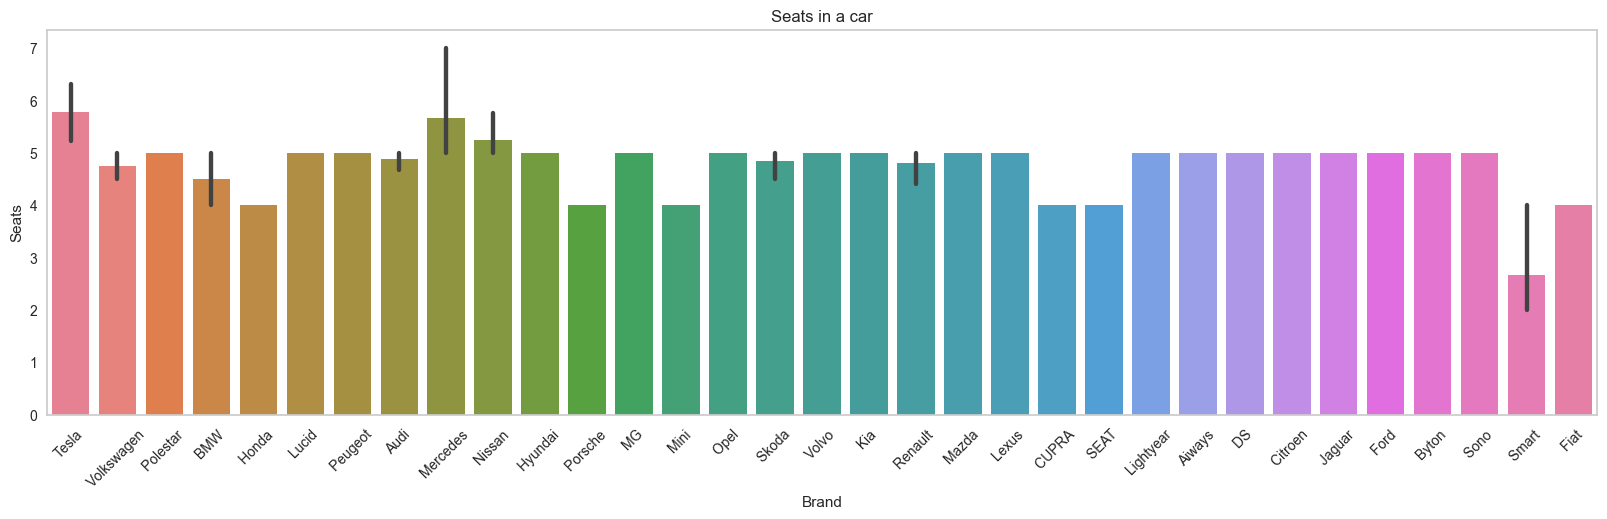

In [635]:
# visualize No of seats in car in dataset
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

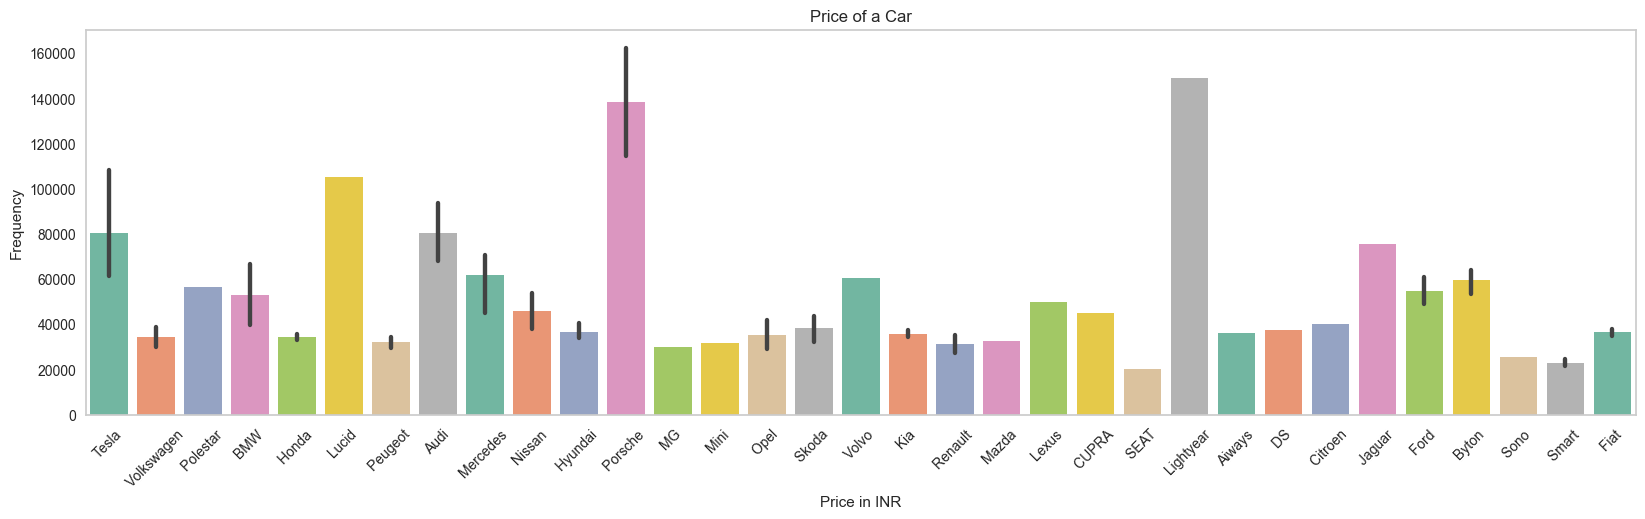

In [636]:
# visualize price of car in dataset
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='PriceEuro',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least


Text(0.5, 1.0, 'Plug Type')

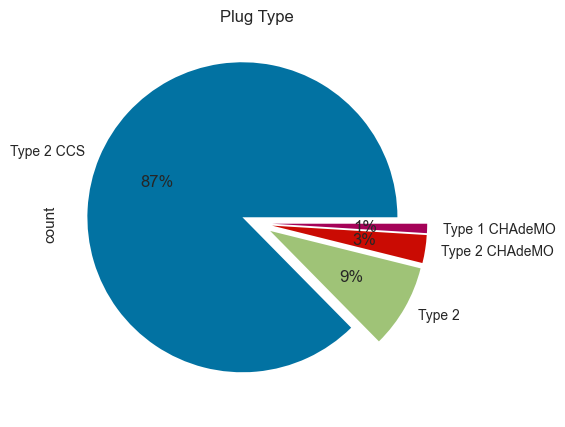

In [637]:
df['PlugType'].value_counts().plot.pie(figsize=(5,10),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCS and Type 1 CHAdeMo the least

Text(0.5, 1.0, 'Body Style')

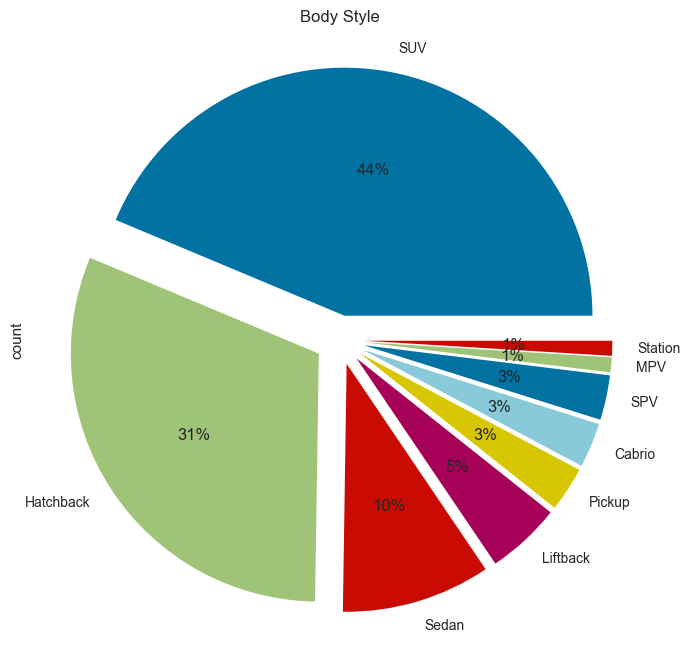

In [638]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,14),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are eiher SUV or Hatchback

Text(0.5, 1.0, 'Segment')

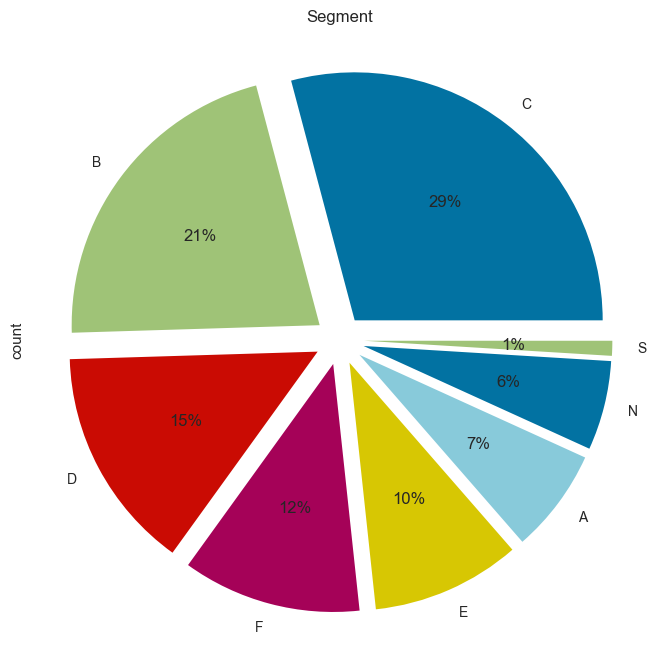

In [639]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Most cars are either C or B type


Text(0.5, 1.0, 'Seats')

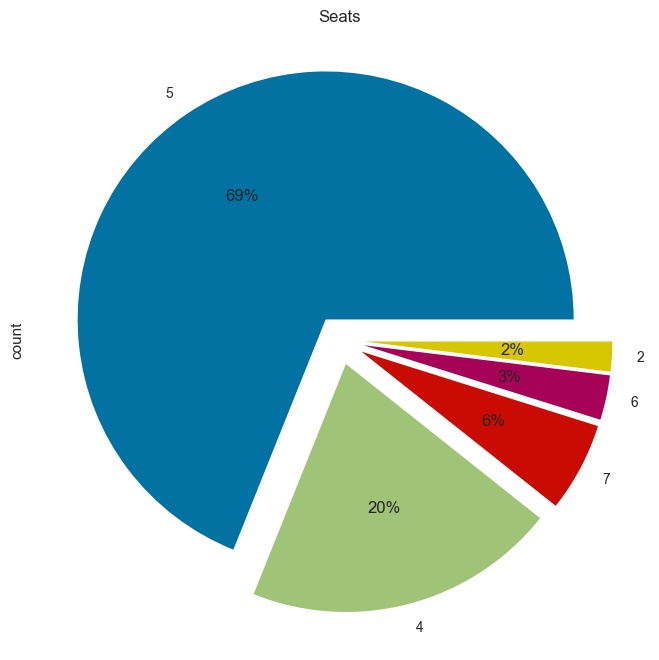

In [640]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

In [641]:
# group the features
df3= df[["TopSpeed", "PriceEuro"]].groupby("TopSpeed").count()
df4= df[["Range", "PriceEuro"]].groupby("Range").count()
df5= df[["Range", "TopSpeed"]].groupby("Range").count()
df5.head()

,TopSpeed
Range,
95,2
100,1
130,1
160,1
170,2


In [642]:
# sort the features in decending
df3=df3.sort_values("TopSpeed",ascending = False).head(10)
df4=df4.sort_values("Range",ascending = False).head(10)
df5=df5.sort_values("Range",ascending = False).head(10)

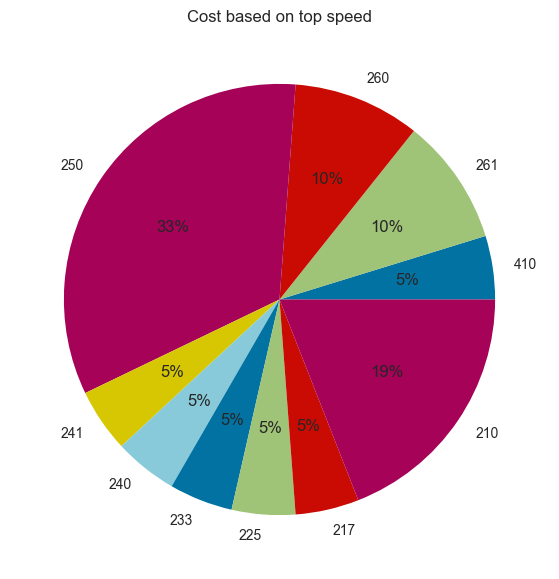

In [643]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["PriceEuro"],labels=df3.index,autopct='%1.0f%%')
plt.show()

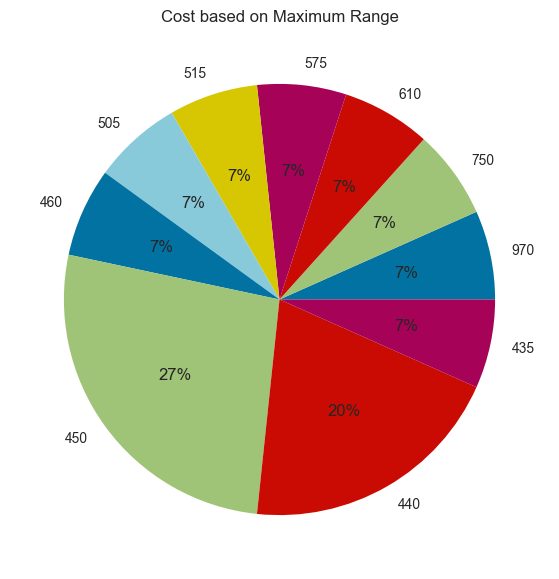

In [644]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["PriceEuro"],labels=df4.index,autopct='%1.0f%%')
plt.show()

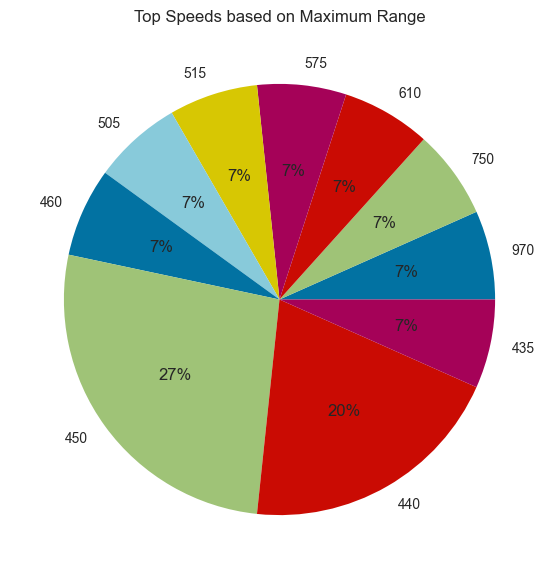

In [645]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed"],labels=df5.index,autopct='%1.0f%%')
plt.show()

### Regression

#### Putting independent variables as x and dependent variable as y

In [646]:
df['PowerTrain'].replace(to_replace=['Rear Wheel Drive','All Wheel Drive','Front Wheel Drive'],value=[0, 2 ,1],inplace=True)
x=df[['Accel','Range','TopSpeed','Efficiency', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

In [647]:
x = np.asarray(x)
x = x.astype('float64')
y = np.asarray(y)

In [648]:
# import statsmodels.api as sm
# x= sm.add_constant(x)

In [649]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [650]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [651]:
from sklearn.metrics import r2_score, confusion_matrix
r2=(r2_score(y_test,pred))
print(r2*100)

78.56505811253689


Around 78% of the dependant variable has been explained by the independant variables

In [652]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

### Clustering

<Axes: xlabel='TopSpeed', ylabel='FastCharge'>

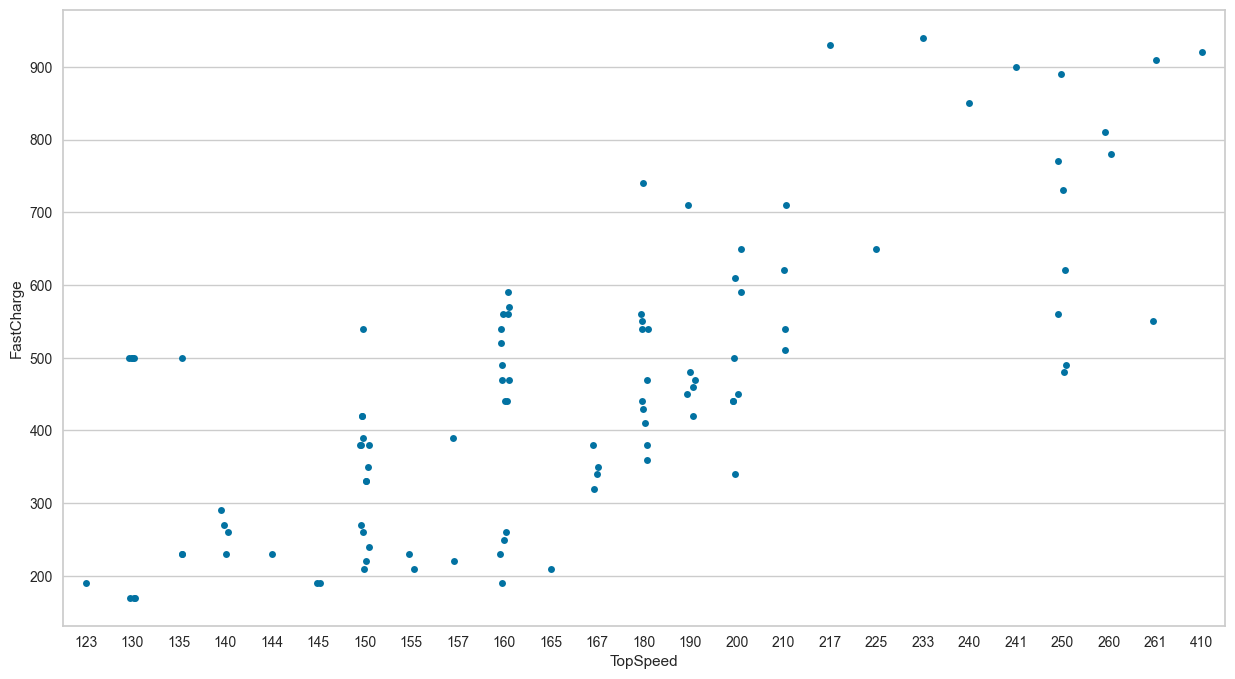

In [656]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed', y='FastCharge', data=df, jitter=True)

<Axes: xlabel='TopSpeed', ylabel='Efficiency'>

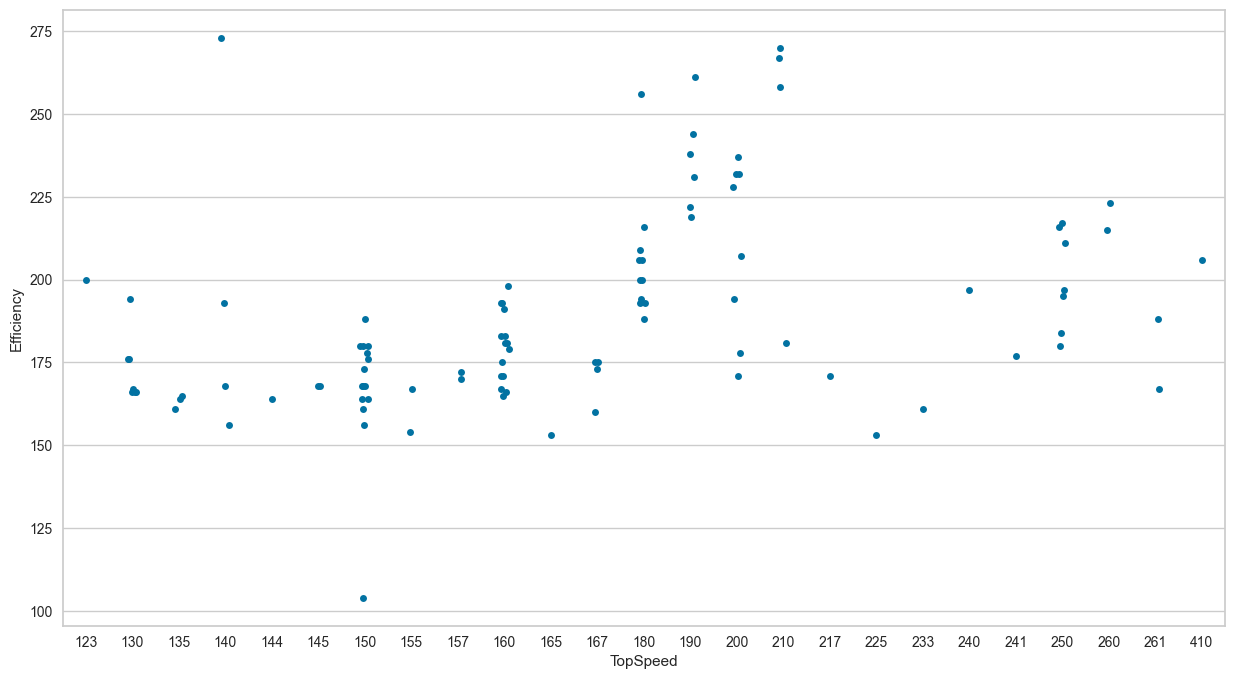

In [657]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed', y='Efficiency', data=df, jitter=True)

In [658]:
from sklearn.preprocessing import StandardScaler
features = ['Accel','TopSpeed','Efficiency','FastCharge', 'RapidCharge','Range', 'Seats', 'PriceEuro','PowerTrain']
# Separating out the features and scale the data
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [659]:
# creating PCA objects
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.281485,0.826023,-0.905625,1.060984,1.122596,-1.329099,0.318445,0.485059,-0.445122
1,-2.021129,-0.598555,-0.636845,0.460437,-0.463894,0.452650,-0.404046,-0.194941,-0.299202
2,1.497596,0.080017,-0.357426,0.010527,0.697073,-0.767080,0.240441,-0.132420,-0.094022
3,0.200797,0.112449,-0.033447,0.804758,-1.404548,0.200184,-0.402523,0.360263,0.154778
4,-2.662291,0.055525,-0.851274,-0.687490,-0.817934,0.167252,-0.485043,0.012101,-0.151101
...,...,...,...,...,...,...,...,...,...
98,-0.371668,-0.404746,0.012035,0.082679,-0.196577,-0.132454,0.155678,0.157212,0.119347
99,2.279787,-0.065603,1.600375,-1.134212,-0.717892,-0.108171,-0.328734,0.142228,0.097904
100,0.718581,-0.353836,0.151631,-0.623559,0.541671,-0.516754,0.032889,-0.335058,-0.242092
101,1.491627,-0.396156,0.956269,-0.865581,-0.249233,-0.228331,0.260496,-0.299248,-0.073711


In [660]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.281485,0.826023,-0.905625,1.060984,1.122596,-1.329099,0.318445,0.485059,-0.445122
1,-2.021129,-0.598555,-0.636845,0.460437,-0.463894,0.452650,-0.404046,-0.194941,-0.299202
2,1.497596,0.080017,-0.357426,0.010527,0.697073,-0.767080,0.240441,-0.132420,-0.094022


In [661]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.402308,0.045457,0.234460,0.138432,0.263794,0.536726,0.066260,0.389726,-0.498004
PC2,0.425692,0.186037,-0.112545,0.040961,0.020809,0.033701,-0.369990,-0.402296,-0.685222
PC3,0.245642,-0.109750,0.734978,-0.216794,-0.552879,0.025509,0.121468,0.058342,-0.126245
PC4,0.345509,0.362322,0.057402,0.458168,0.043598,-0.424516,0.042437,0.590615,-0.058244
Pc5,0.197910,-0.596745,-0.463206,-0.243478,-0.211007,-0.006003,-0.018375,0.471988,-0.251426
PC6,0.394599,-0.030085,-0.189713,0.328722,-0.057649,0.417098,0.695598,-0.190648,0.042885
PC7,0.145117,-0.630358,0.293889,0.542255,0.253073,0.026620,-0.319814,-0.109282,0.148997
PC8,0.393150,0.237779,-0.021331,-0.180370,0.032116,0.574930,-0.432841,0.249337,0.418102
PC9,0.326674,-0.095406,0.226930,-0.477836,0.713777,-0.157049,0.261409,0.028470,-0.032706


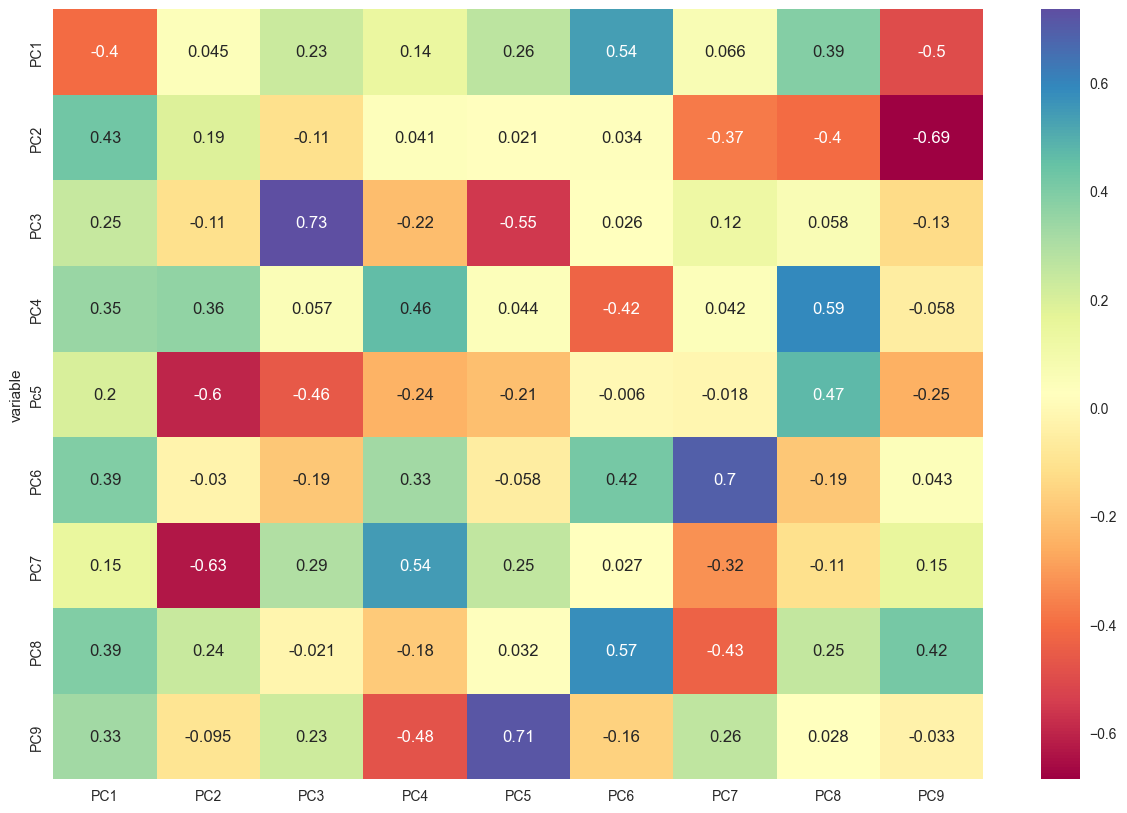

In [662]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (15,10)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

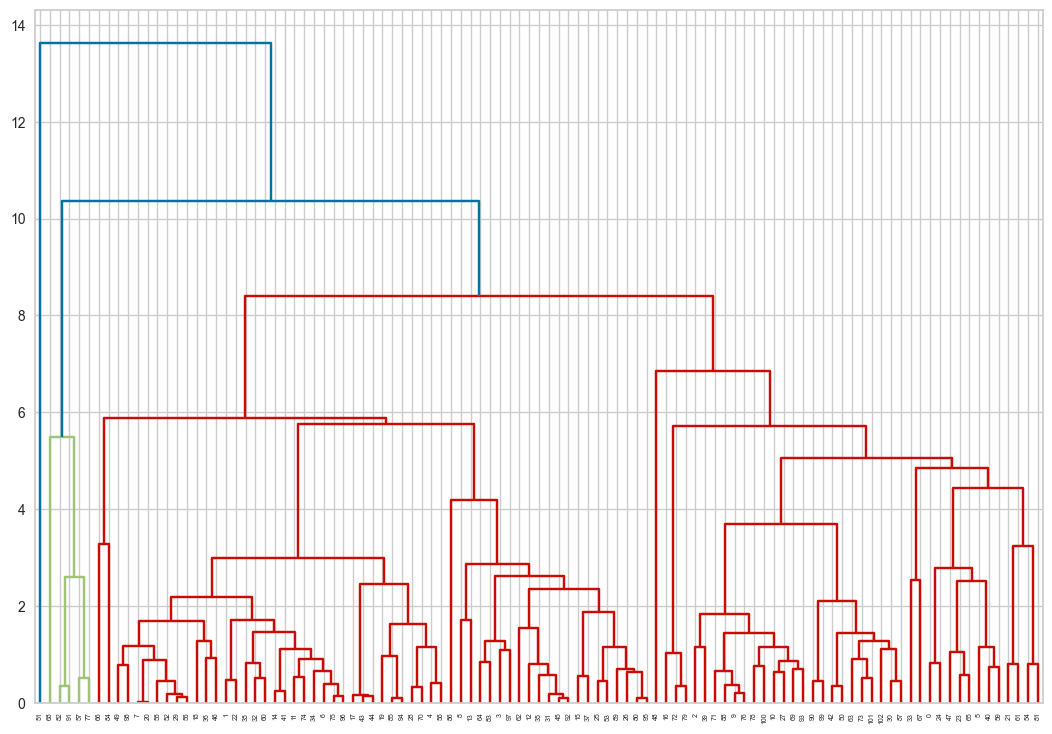

In [663]:
from scipy.cluster.hierarchy import dendrogram, linkage
# visualize the cluster by dendrograms
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

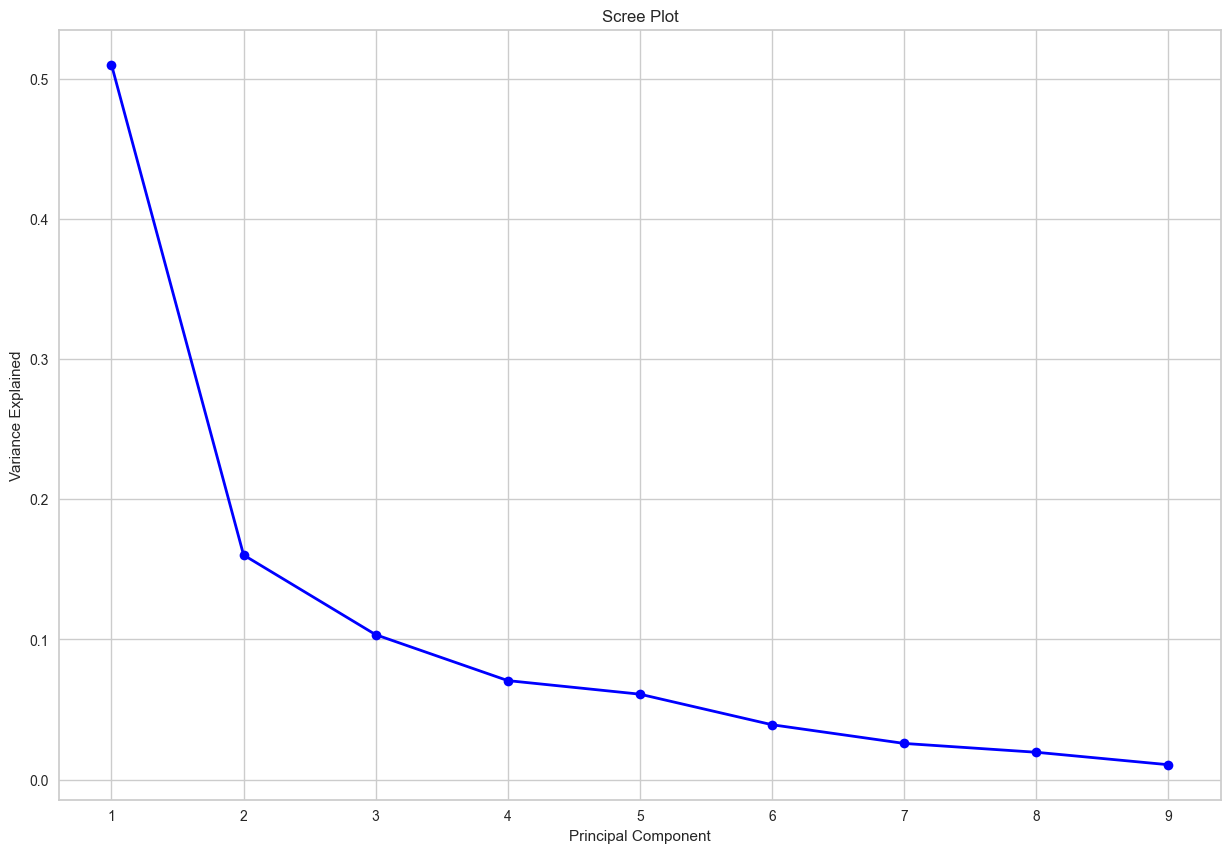

In [664]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

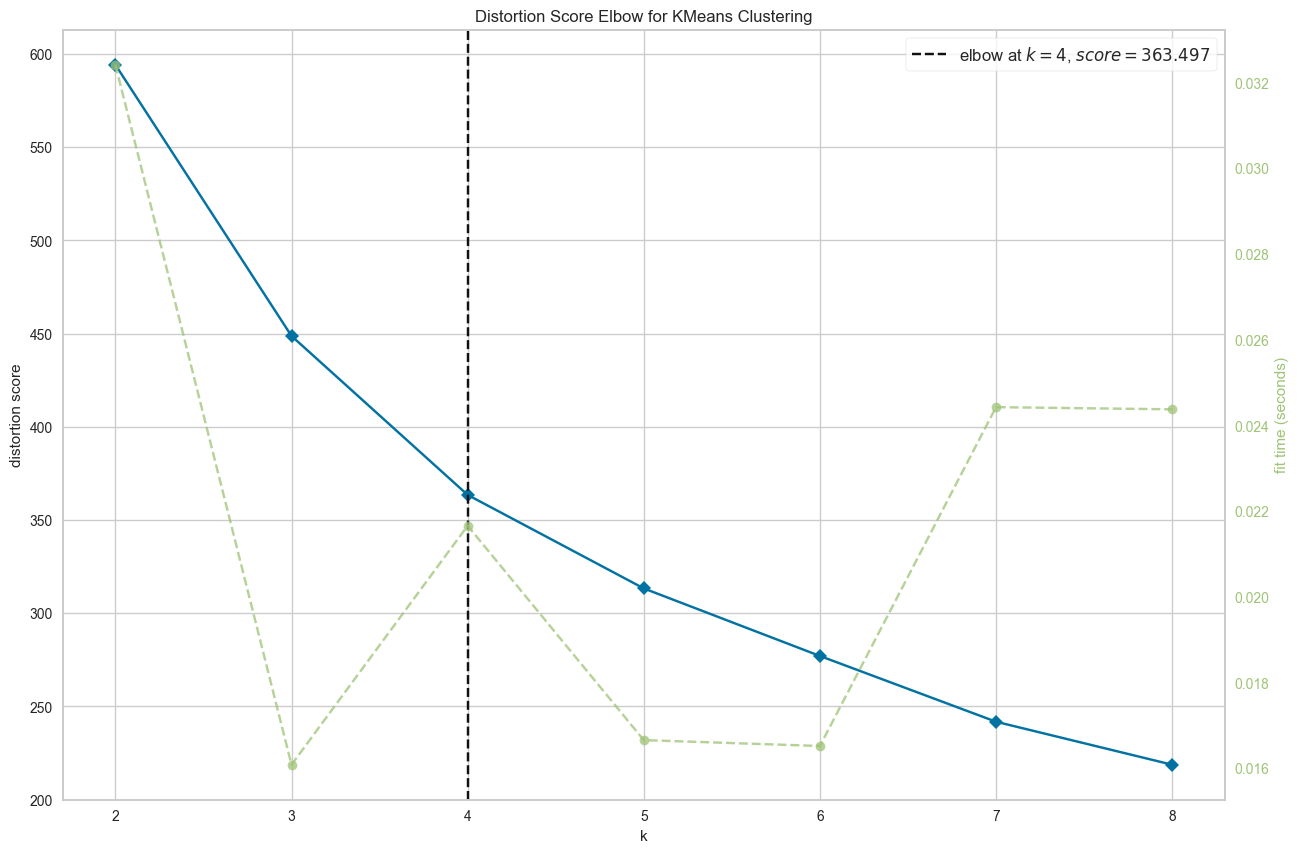

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [665]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

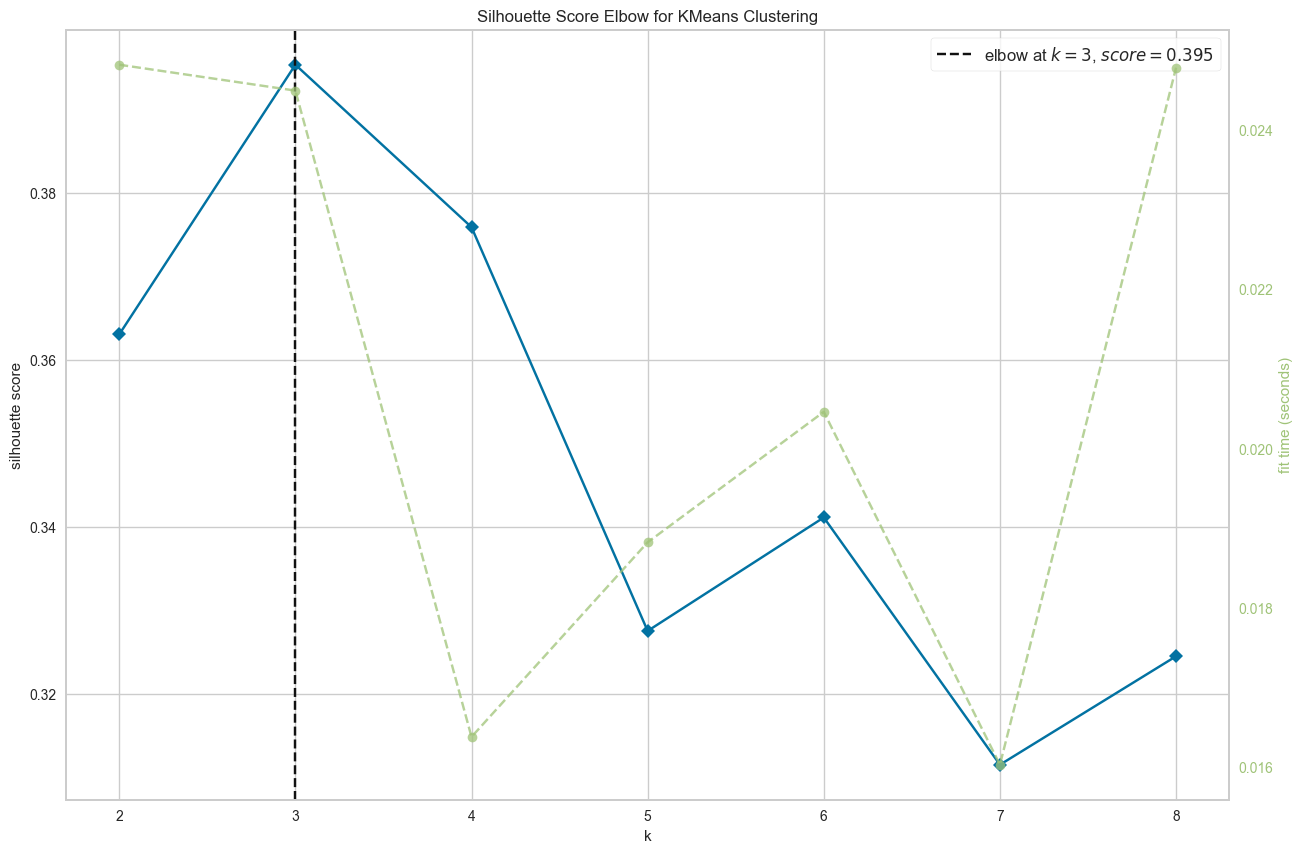

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [666]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

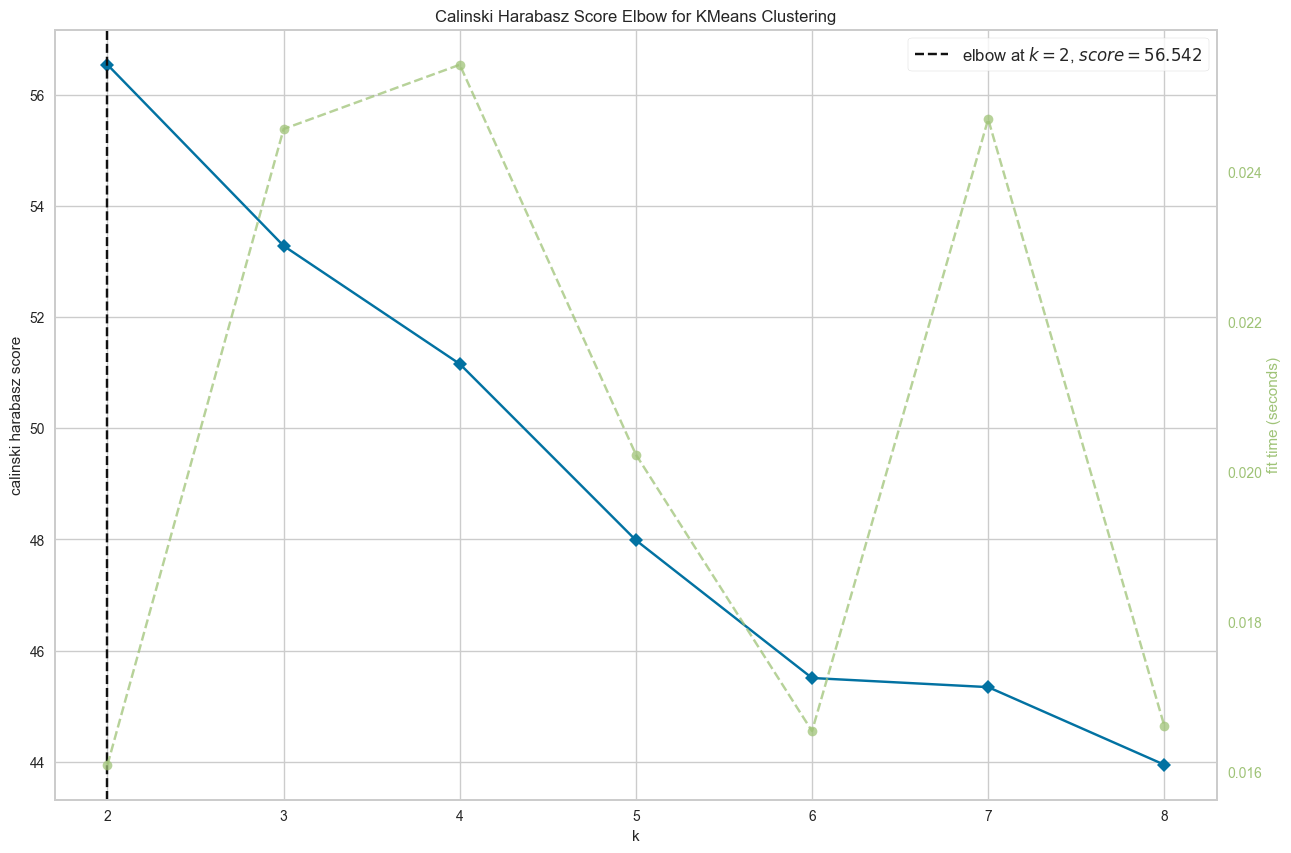

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [667]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [668]:
#K-means clustering for 4 cluster

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[1 0 2 0 0 1 0 0 0 2 2 0 0 2 0 0 1 0 0 0 0 2 0 1 1 0 0 2 0 0 2 0 0 2 0 0 0
 0 0 2 1 0 2 0 0 0 0 1 1 0 2 1 0 0 2 0 0 3 0 1 0 2 2 2 0 1 0 2 3 2 0 2 1 2
 0 0 2 3 2 1 0 2 3 0 2 0 2 2 2 0 2 3 0 2 0 0 0 0 0 2 2 2 2]
363.4973223698871
4
[[-1.32188711 -0.39282042 -0.43916019  0.03151232 -0.17200081  0.07864999
  -0.0461817   0.02324947 -0.03852165]
 [ 3.30795075  1.35971603 -0.72839324 -0.17160162  0.40544881  0.21793143
  -0.20131336  0.17548934 -0.01495582]
 [ 1.47395737 -0.49694098  0.72522371 -0.08948566  0.04015119 -0.22026023
   0.15532404 -0.05260415  0.05332705]
 [-4.02199574  3.80905707  1.90748871  0.68484183  0.51207406  0.00935393
   0.01886686 -0.36605019  0.10592155]]


c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [669]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 53, 2: 32, 1: 13, 3: 5})

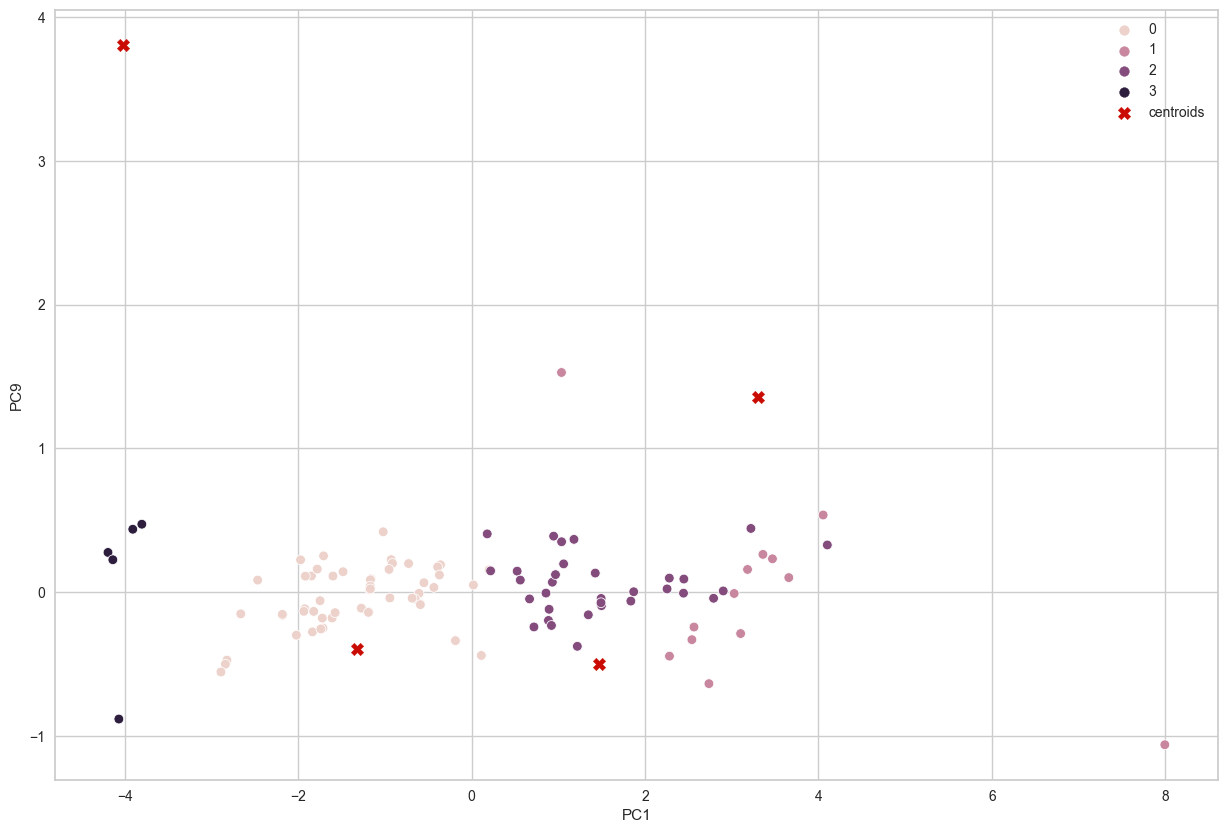

In [670]:
#Visulazing clusters
sb.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

### Regression for data2

In [671]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['PriceEuro']

In [672]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [673]:
print(lm.intercept_)

55811.56310679612


In [674]:
lm.coef_

array([ 13354.7391477 ,   8076.99728701,   -724.59616775,  -6126.92463748,
         1090.91861904,  19529.55461987, -14702.97716571,   8469.63516403,
        14202.32160949])

In [675]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [676]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,13354.739148
PC2,8076.997287
PC3,-724.596168
PC4,-6126.924637
Pc5,1090.918619
PC6,19529.554620
PC7,-14702.977166
PC8,8469.635164
PC9,14202.321609


In [677]:
predictions=lm.predict(X_test)
predictions

array([ 45000.,  30000.,  62900.,  38987.,  36837.,  65620.,  34900.,
        40000.,  47500.,  31184.,  31900.,  45000.,  24534., 180781.,
        79445.,  38105.,  53500.,  34459.,  45000., 215000.,  58620.,
        68040.,  70631.,  24790., 149000., 102945., 148301.,  40000.,
        56440.,  65000.,  36837.,  37500.,  33971., 125000.,  33000.,
        35000.,  37900.,  60437.,  29146.,  33246.,  67358.,  37237.])

In [678]:
y_test

37     45000
1      30000
69     62900
80     38987
92     36837
61     65620
85     34900
53     40000
88     47500
32     31184
6      31900
71     45000
43     24534
16    180781
50     79445
31     38105
97     53500
14     34459
25     45000
51    215000
21     58620
3      68040
84     70631
57     24790
48    149000
47    102945
79    148301
58     40000
2      56440
13     65000
45     36837
89     37500
41     33971
23    125000
26     33000
22     35000
94     37900
27     60437
20     29146
66     33246
30     67358
35     37237
Name: PriceEuro, dtype: int64

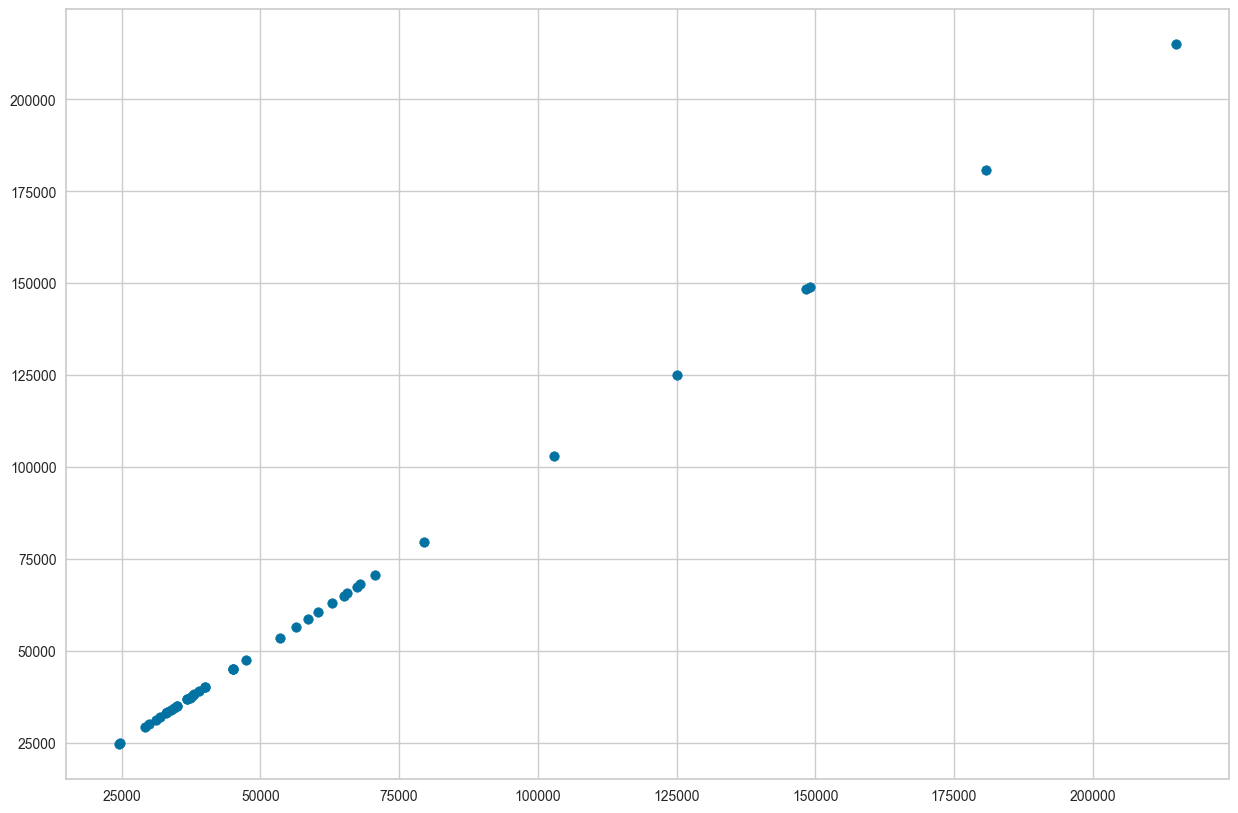

In [679]:
plt.scatter(y_test, predictions)

C:\Users\samee\AppData\Local\Temp\ipykernel_22500\3016481388.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='PriceEuro', ylabel='Density'>

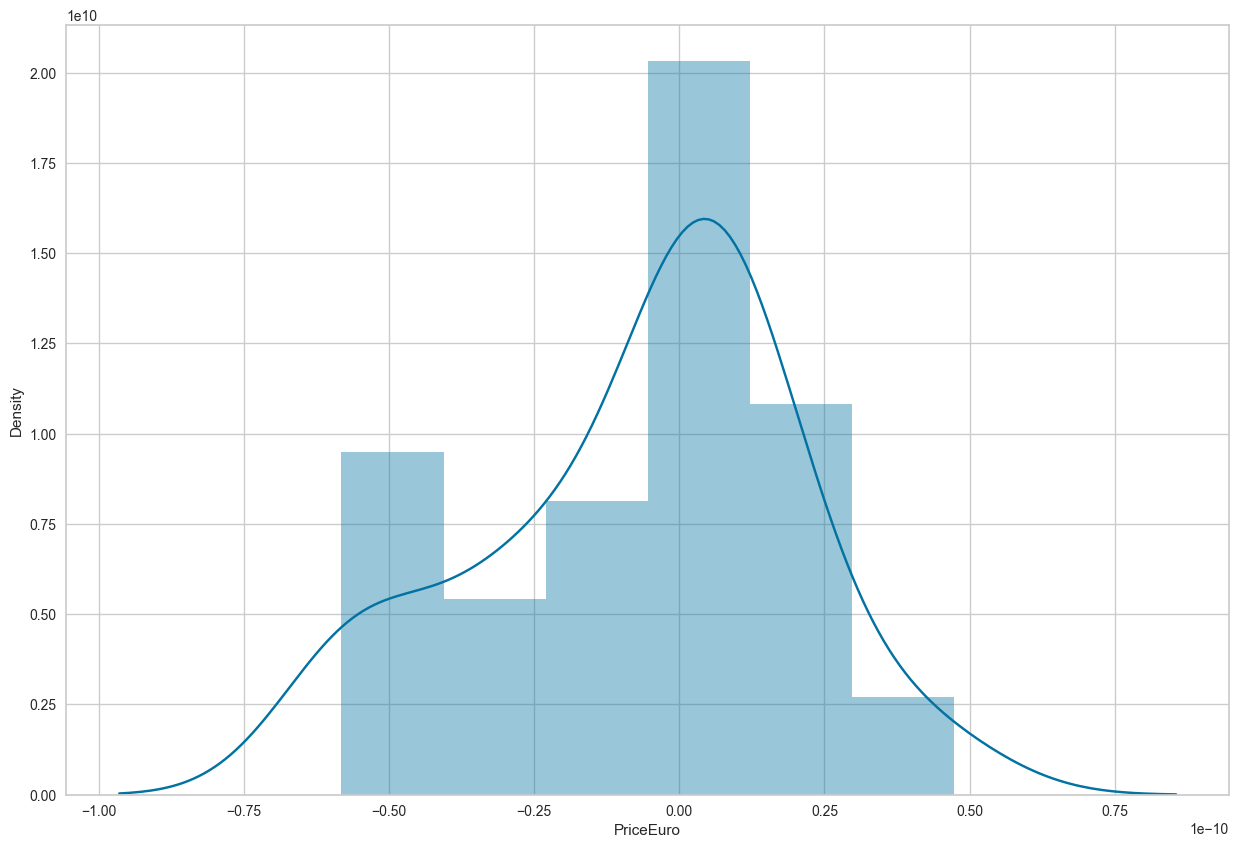

In [680]:
#Residual histogram plot
sb.distplot((y_test-predictions))

In [681]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.0355357611108393e-11
MSE: 7.578549993104882e-22
RMSE: 2.7529166338821235e-11
